# Linear Regression Algorithm

![](https://miro.medium.com/max/1970/1*KP0U9y1o4QUaFMwUsXqXyw.png)

## Outline:
* What is Simple Linear Regression?
* What is Multiple Linear Regression?
* Practical

## What is Simple Linear Regression?

<img src='https://image3.slideserve.com/6614841/simple-linear-regression-model2-l.jpg' width='400' hight='200'>

## What is Multiple Linear Regression?

<img src='https://th.bing.com/th/id/OIP.IZdg3wgZtalDXWX13IQCbwHaFj?pid=ImgDet&rs=1' width='400' hight='200'>

## Practicle:

## Bussiness Problem: Predict The Price Of Bangalore House
* Using Linear Regression- Supervised Machine Learning Algorithm

### Step 1: Importing The Libraries:

In [1]:
# Let's import opendataset as od
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Downloading The Datasets:

In [2]:
# Downloading dataset:
od.download('https://www.kaggle.com/datasets/bhavik0901/bangalore-house-price-prediction')


Skipping, found downloaded files in ".\bangalore-house-price-prediction" (use force=True to force download)


### Step 3: Loading & Viewing The Datasets:

In [3]:
# Loading the dataset:
df=pd.read_csv('bangalore-house-price-prediction/Bengaluru_House_Data.csv')

In [4]:
# Viewing the dataset:
df.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
# Shape of dataset
df.shape

(13320, 9)

In [6]:
# Unique values
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [7]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [8]:
# Let's count unique values of Categorical value's column:
df_cat=df.select_dtypes(include=['object']).columns
for i in df_cat:
    print(i,'->',len(set(df[i])))
    print(df[i].value_counts())
    print('......................................................')
    print(' ')

area_type -> 4
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
......................................................
 
availability -> 81
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
......................................................
 
location -> 1306
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layo

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [10]:
# View the basic statistics:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [11]:
# Let's see the dtype
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

### Step 4: Handeling The Missing Values:

<AxesSubplot:>

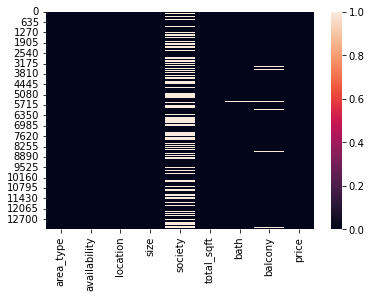

In [12]:
sns.heatmap(df.isnull())

In [13]:
df2=df.drop(columns=['society'])

In [14]:
df2.shape

(13320, 8)

In [15]:
# Missing Value imputaion with mean value of Balcony column:
df2['balcony']=df2['balcony'].fillna(df2['balcony'].mean())

In [16]:
# Checking missing values:
df2.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [17]:
df2.shape

(13320, 8)

In [18]:
# Filling the missing values of Bath column with Mode value:
df2.bath=df2['bath'].fillna(df2['balcony'].mode()[0])

In [19]:
# Checking missing values:
df2.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath             0
balcony          0
price            0
dtype: int64

In [20]:
df2.shape

(13320, 8)

In [21]:
# Dropping these remaining 17 null rows:
df2=df2.dropna()

<AxesSubplot:>

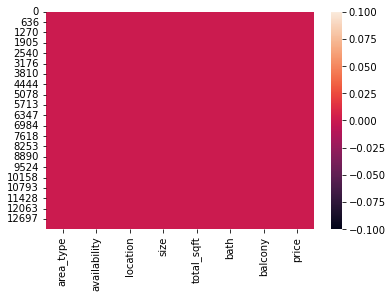

In [22]:
sns.heatmap(df2.isnull())

In [23]:
df2.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [24]:
df2.shape

(13303, 8)

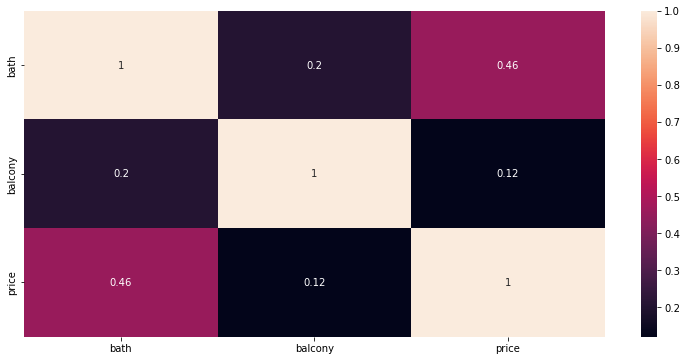

In [25]:
# Let's see the corelation matrix:
plt.figure(figsize=(13,6))
sns.heatmap(df.corr(),annot=True);

### Step 3: Preparing The Dataset:

### 3.1 Cleaning `size` Column:

In [26]:
# Understanding according to size:
df2['size'].value_counts()

2 BHK         5199
3 BHK         4309
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [27]:
# Extracting integer form size:
size=[]
for i in df2['size']:
    size.append(i.split(' ')[0])
# Creating new column from size list:
df2['new_size']=size

# Changing the data type of size_new to integer
df2['new_size']=df2['new_size'].astype(int)

#Checking the dataset
df2.head(10)

,area_type,availability,location,size,total_sqft,bath,balcony,price,new_size
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.000000,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.000000,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.000000,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.000000,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.000000,51.00,2
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,1170,2.0,1.000000,38.00,2
6,Super built-up Area,18-May,Old Airport Road,4 BHK,2732,4.0,1.584376,204.00,4
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,3300,4.0,1.584376,600.00,4
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,1310,3.0,1.000000,63.25,3
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,1020,6.0,1.584376,370.00,6


### 3.2 Cleaning `total_sqft` column:

In [28]:
area=df2['total_sqft'].value_counts()
print(area)

1200    843
1100    221
1500    204
2400    195
600     180
       ... 
3580      1
2461      1
1437      1
2155      1
4689      1
Name: total_sqft, Length: 2110, dtype: int64


#### Note:
* We can see in this column there are different types of units and values now we need to change all into unoform single unit.

In [29]:
# Creating list of different measures sorting converted values of square feet:
hyphen = []
yards = []
acres = []
meter = []
perch = []
cents = []
guntha = []
ground = []

# Converting hyphen values into average sqft:
for h in df2['total_sqft'][df2['total_sqft'].str.contains('-')]:
    splited_value=h.split('-')
    value_hyphen=float(splited_value[0]) + float(splited_value[1])
    value_hyphen_sqft = float(value_hyphen/2)
    hyphen.append(value_hyphen_sqft)
    
# Converting yard values into average sqft:
for y in df2['total_sqft'][df2['total_sqft'].str.contains('Yard')]:
    splited_value=y.split('S')
    value_yards=float(splited_value[0])
    value_yards_sqft = float(value_yards*9)
    yards.append(value_yards_sqft)
    
# Converting  acres into sqft:
for a in df2['total_sqft'][df2['total_sqft'].str.contains('Acres')]:
    splited_value=a.split('A')
    value_acres=float(splited_value[0])
    value_acres_sqft = float(value_acres*43560)
    acres.append(value_acres_sqft)
    
# Converting perch values into sqft:
for p in df2['total_sqft'][df2['total_sqft'].str.contains('Perch')]:
    splited_value=p.split('P')
    value_perch=float(splited_value[0])
    value_perch_sqft = float(value_perch*272.25)
    perch.append(value_perch_sqft)
    
# Converting sq.meter values in sqft:
for m in df2['total_sqft'][df2['total_sqft'].str.contains('Sq. Meter')]:
    splited_value=m.split('S')
    value_meter=float(splited_value[0])
    value_meter_sqft = float(value_meter*10.7639)
    meter.append(value_meter_sqft)
    
# Converting cents values into sqft:
for c in df2['total_sqft'][df2['total_sqft'].str.contains('Cents')]:
    splited_value=c.split('Ce')
    value_cents=float(splited_value[0])
    value_cents_sqft = float(value_cents*435.540069686)
    cents.append(value_cents_sqft)
    
# Converting guntha values into sqft:
for g in df2['total_sqft'][df2['total_sqft'].str.contains('Guntha')]:
    splited_value=g.split('Gu')
    value_guntha=float(splited_value[0])
    value_guntha_sqft = float(value_guntha*1089.08734481)
    guntha.append(value_guntha_sqft)
    
# Converting Grounds values into sqft:
for G in df2['total_sqft'][df2['total_sqft'].str.contains('Grounds')]:
    splited_value=G.split('Gr')
    value_ground=float(splited_value[0])
    value_ground_sqft = float(value_ground*2400)
    ground.append(value_ground_sqft)
    
# Extracting and values have integer and float and converting it into jinteger:
total_sqft_int = df2['total_sqft'][~df2['total_sqft'].str.contains('-') & ~df2['total_sqft'].str.contains('Yards') & 
                                   ~df2['total_sqft'].str.contains('Acres') & ~df2['total_sqft'].str.contains('Sq. Meter') & 
                                   ~df2['total_sqft'].str.contains('Perch') & ~df2['total_sqft'].str.contains('Cents') & 
                                   ~df2['total_sqft'].str.contains('Guntha') & ~df2['total_sqft'].str.contains('Grounds')]

total_sqft_int = total_sqft_int.map(float)

total_sqft_df= pd.concat([pd.DataFrame(yards,df2['total_sqft'][df2['total_sqft'].str.contains('Yards')].index),
                          pd.DataFrame(acres,df2['total_sqft'][df2['total_sqft'].str.contains('Acres')].index),
                          pd.DataFrame(meter,df2['total_sqft'][df2['total_sqft'].str.contains('Sq. Meter')].index),
                          pd.DataFrame(perch,df2['total_sqft'][df2['total_sqft'].str.contains('Perch')].index),
                          pd.DataFrame(cents,df2['total_sqft'][df2['total_sqft'].str.contains('Cents')].index),
                          pd.DataFrame(guntha,df2['total_sqft'][df2['total_sqft'].str.contains('Guntha')].index),
                          pd.DataFrame(ground,df2['total_sqft'][df2['total_sqft'].str.contains('Grounds')].index),
                          pd.DataFrame(hyphen,df2['total_sqft'][df2['total_sqft'].str.contains('-')].index),
                          total_sqft_int], axis=0)
total_sqft_df2 =  total_sqft_df.sort_index(axis=0)


In [30]:
# Checking total_sqft_df2:
total_sqft_df2

,0
0,1056.0
1,2600.0
2,1440.0
3,1521.0
4,1200.0
...,...
13315,3453.0
13316,3600.0
13317,1141.0
13318,4689.0


In [31]:
# Inserting cleaned total_sqft as a new column
df2['new_total_sqft']=total_sqft_df2

In [32]:
df2['new_total_sqft']=df2['new_total_sqft'].astype(float)

In [33]:
# Viewing the dataset:
df2.head(5)

,area_type,availability,location,size,total_sqft,bath,balcony,price,new_size,new_total_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,2,1200.0


### 3.3 Dropping the unnessecery columns:

In [34]:
df2=df2.drop(columns=['total_sqft','size'])

In [35]:
df2.head(3)

,area_type,availability,location,bath,balcony,price,new_size,new_total_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1.0,39.07,2,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,2.0,3.0,62.00,3,1440.0


### Step 4: Removing Outliers:

### 4.1: Let's visualize The Outliers:

bath


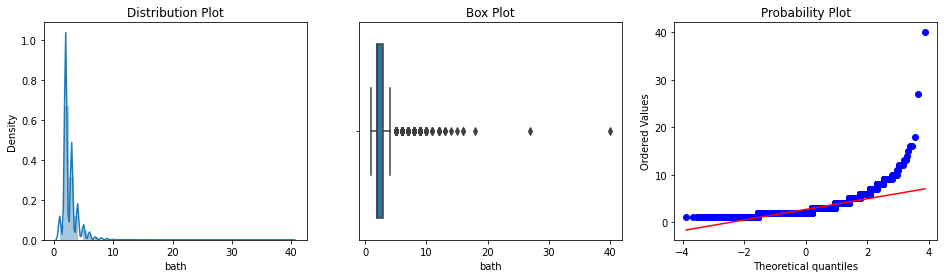

balcony


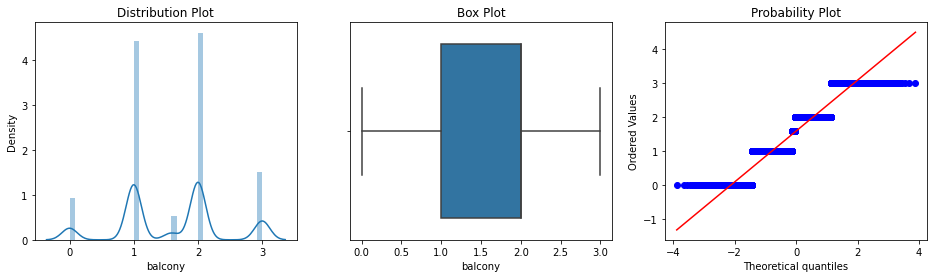

price


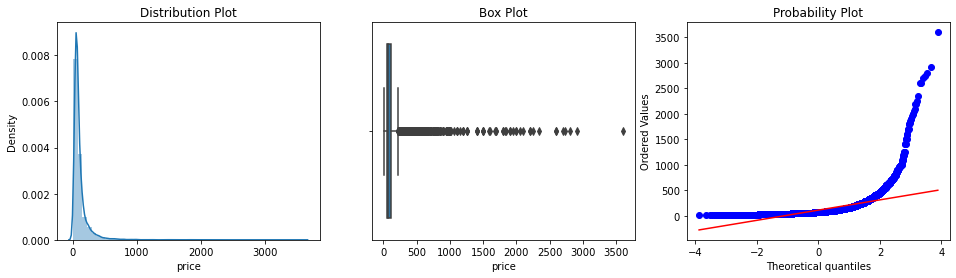

new_size


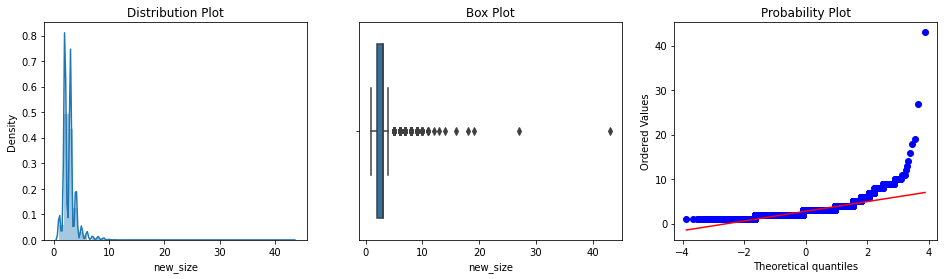

new_total_sqft


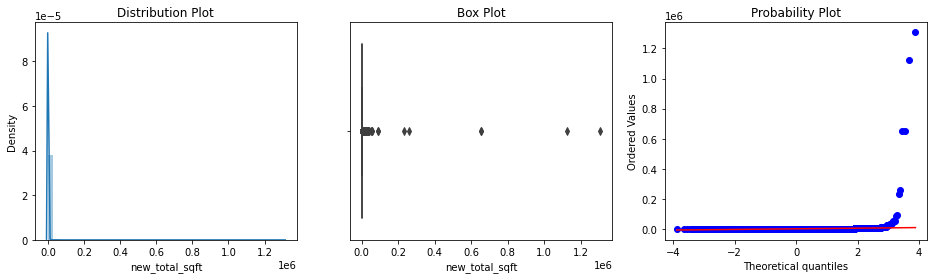

In [36]:
# First import the stats library from scipy.stats
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
# Let's create a Diagonostic Plot on the df2:

def Diagnostic_Plot(df2,var):
    plt.figure(figsize=(16,4))
    plt.subplot(1,3,1)
    sns.distplot(df2[var])
    plt.title('Distribution Plot')
    plt.subplot(1,3,2)
    sns.boxplot(df2[var])
    plt.title('Box Plot')
    plt.subplot(1,3,3)
    stats.probplot(df2[var],dist='norm',plot=plt)
    plt.show()

variable=df2.select_dtypes(include=['float64','int32']).columns
for i in variable:
    print(i)
    Diagnostic_Plot(df2,i)

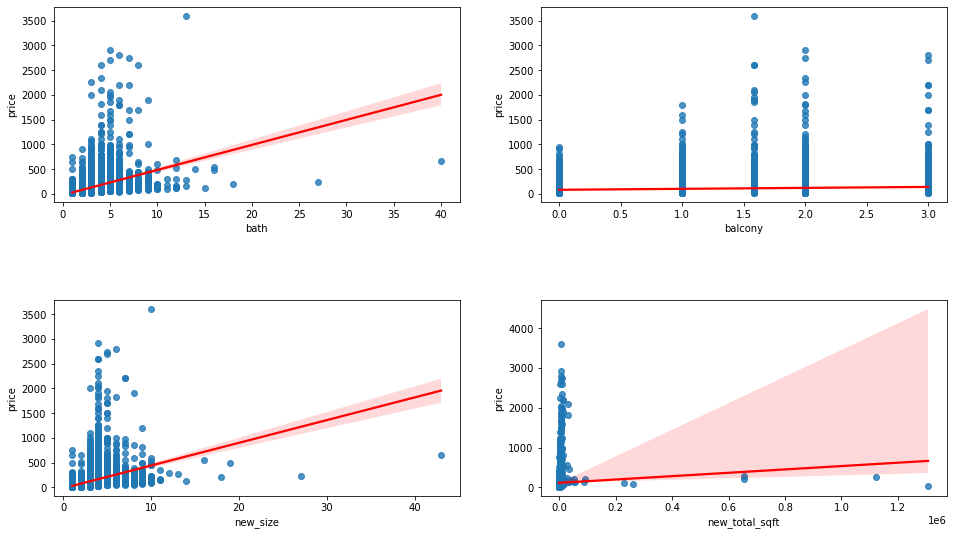

In [37]:
# Creating Regression plot:
var = df2.select_dtypes(include=['float64','int32']).columns.drop('price')

plt.figure(figsize=(16,9))
for i,j in enumerate(var):
    plt.subplot(2,2,i+1)
    sns.regplot(x=df2[j], y=df2['price'], line_kws={'color':'red'});
plt.subplots_adjust(hspace=0.5)


In [38]:
df2.head()

,area_type,availability,location,bath,balcony,price,new_size,new_total_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1.0,39.07,2,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,2.0,3.0,62.00,3,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2.0,1.0,51.00,2,1200.0


### 4.2: Eleminating the outliers where a average sqft is less than 350:

In [39]:
# Seprating the data where a average sqft is less than 350:
df2[df2['new_total_sqft']/df2['new_size']<350].head()

,area_type,availability,location,bath,balcony,price,new_size,new_total_sqft
9,Plot Area,Ready To Move,Gandhi Bazar,6.0,1.584376,370.0,6,1020.0
26,Super built-up Area,Ready To Move,Electronic City,1.0,1.000000,23.1,2,660.0
29,Super built-up Area,Ready To Move,Electronic City,2.0,1.000000,47.0,3,1025.0
45,Plot Area,Ready To Move,HSR Layout,9.0,1.584376,200.0,8,600.0
58,Plot Area,Ready To Move,Murugeshpalya,4.0,1.000000,150.0,6,1407.0


In [40]:
# Droping this filltered data:
df2 = df2[~(df2['new_total_sqft']/df2['new_size']<350)]
df2.head()

,area_type,availability,location,bath,balcony,price,new_size,new_total_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1.0,39.07,2,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,2.0,3.0,62.00,3,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2.0,1.0,51.00,2,1200.0


In [41]:
# Let's check the shape:
df2.shape

(12204, 8)

### Step 5: Insert a new column with `price_per_sqft`:

In [42]:
df2['price_per_sqft'] = df2['price']/df2['new_total_sqft'] * 100000

In [43]:
# Viewing the dataset:
df2.head()

,area_type,availability,location,bath,balcony,price,new_size,new_total_sqft,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1.0,39.07,2,1056.0,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,2.0,3.0,62.00,3,1440.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2.0,1.0,51.00,2,1200.0,4250.000000


### Step 6: Removing the outliers from `price_per_sqft`:

In [44]:
# Let's see the statisticsl inside of price_per_sqft column:
df2['price_per_sqft'].describe()

count     12204.000000
mean       6174.431182
std        4014.446908
min           2.257423
25%        4200.000000
50%        5259.286313
75%        6800.000000
max      176470.588235
Name: price_per_sqft, dtype: float64

In [45]:
# Removing the outliers:
mean = np.mean(df2['price_per_sqft'])
std = np.std(df2['price_per_sqft'])
df2 = df2[(df2['price_per_sqft']>(mean-std)) & (df2['price_per_sqft']<=(mean+std))]

In [46]:
# Resetting index number
df2.reset_index(drop=True)

,area_type,availability,location,bath,balcony,price,new_size,new_total_sqft,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1.0,39.07,2,1056.0,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,2.0,3.0,62.00,3,1440.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2.0,1.0,51.00,2,1200.0,4250.000000
...,...,...,...,...,...,...,...,...,...
11105,Super built-up Area,Ready To Move,Uttarahalli,2.0,1.0,57.00,3,1345.0,4237.918216
11106,Super built-up Area,Ready To Move,Green Glen Layout,3.0,3.0,112.00,3,1715.0,6530.612245
11107,Built-up Area,Ready To Move,Whitefield,4.0,0.0,231.00,5,3453.0,6689.834926
11108,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2.0,1.0,60.00,2,1141.0,5258.545136


In [47]:
# Let's check the shape:
df2.shape

(11110, 9)

### Step 7: Visualize the data after outlier removed:

bath


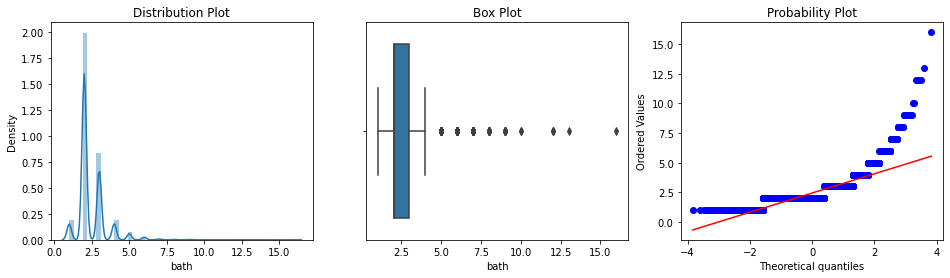

balcony


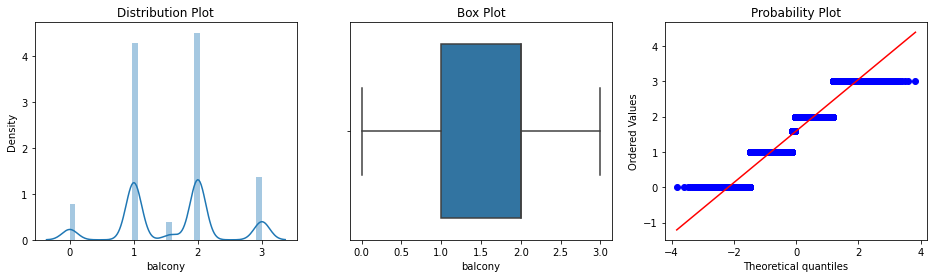

price


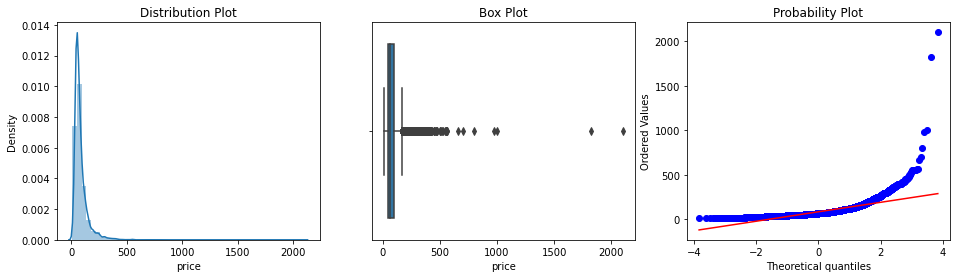

new_size


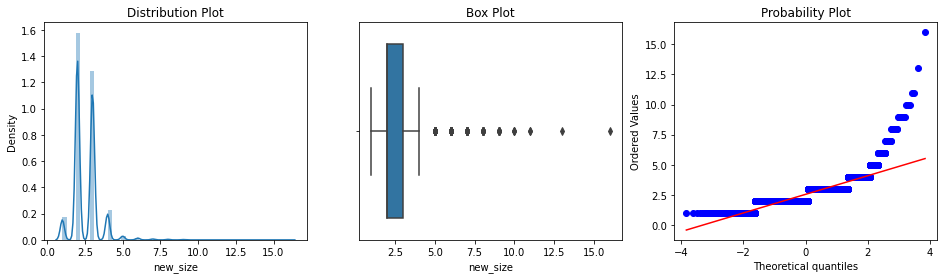

new_total_sqft


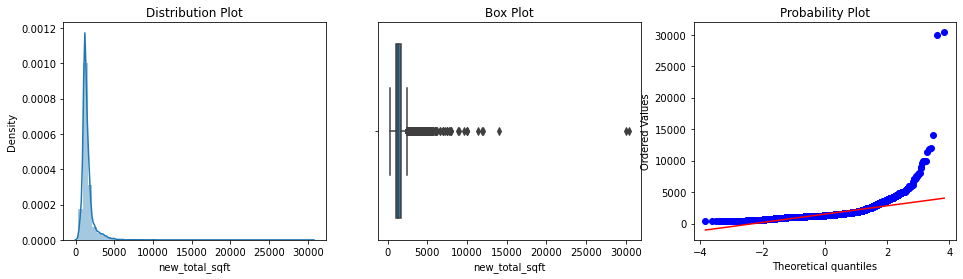

price_per_sqft


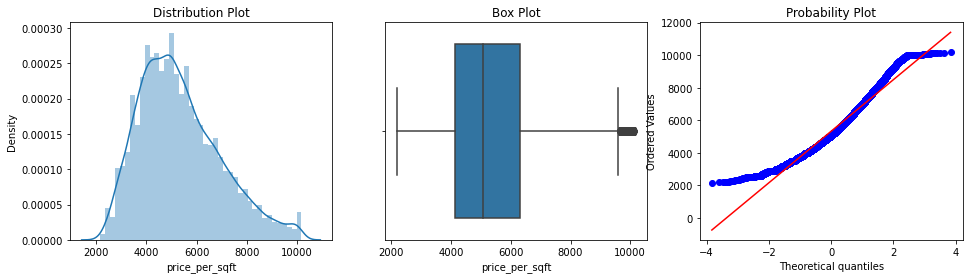

In [48]:
# Let's again create a Diagonostic Plot on the df2:

def Diagnostic_Plot(df2,var):
    plt.figure(figsize=(16,4))
    plt.subplot(1,3,1)
    sns.distplot(df2[var])
    plt.title('Distribution Plot')
    plt.subplot(1,3,2)
    sns.boxplot(df2[var])
    plt.title('Box Plot')
    plt.subplot(1,3,3)
    stats.probplot(df2[var],dist='norm',plot=plt)
    plt.show()

variable=df2.select_dtypes(include=['float64','int32']).columns
for i in variable:
    print(i)
    Diagnostic_Plot(df2,i)

In [49]:
# Checking the dataset:
df2.head()

,area_type,availability,location,bath,balcony,price,new_size,new_total_sqft,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1.0,39.07,2,1056.0,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,2.0,3.0,62.00,3,1440.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2.0,1.0,51.00,2,1200.0,4250.000000


### Step 8: Eliminating the data where `bath > size of flat+2`:

In [50]:
# Filtering the data where bath value > size of flat+2:
df2[df2['bath']>df2['new_size']+2]

,area_type,availability,location,bath,balcony,price,new_size,new_total_sqft,price_per_sqft
2620,Super built-up Area,Ready To Move,Sathya Sai Layout,9.0,1.000000,1000.0,6,11338.0,8819.897689
7709,Built-up Area,Ready To Move,Chikkabanavar,7.0,2.000000,80.0,4,2460.0,3252.032520
11366,Built-up Area,Ready To Move,Nagasandra,8.0,1.584376,450.0,4,7000.0,6428.571429
12103,Super built-up Area,Ready To Move,Thanisandra,6.0,2.000000,116.0,3,1806.0,6423.034330


In [51]:
# Filtering the data where bath value < size of flat + 2:
df2_filtered=df2[df2['bath']<df2['new_size']+2]

bath


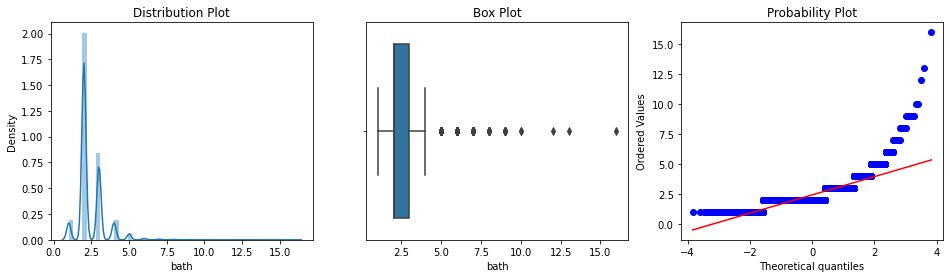

balcony


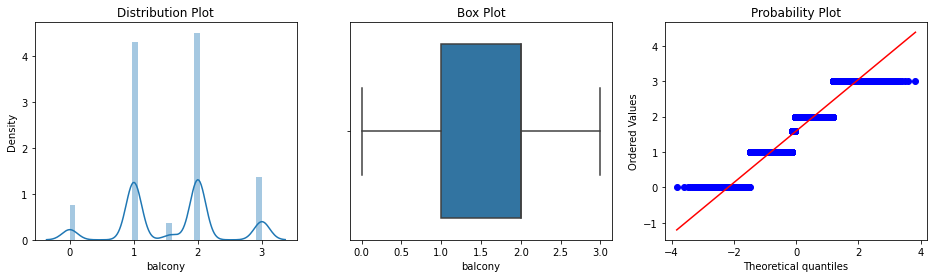

price


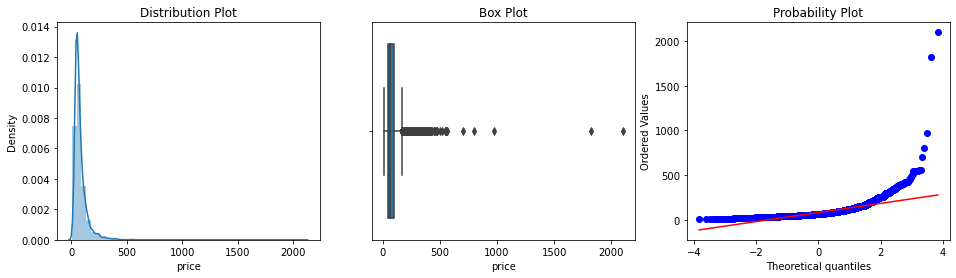

new_size


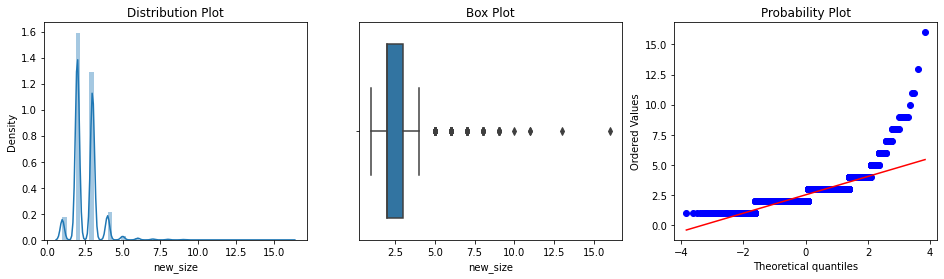

new_total_sqft


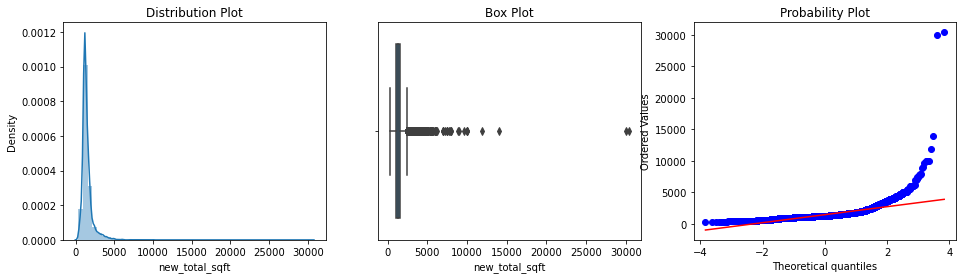

price_per_sqft


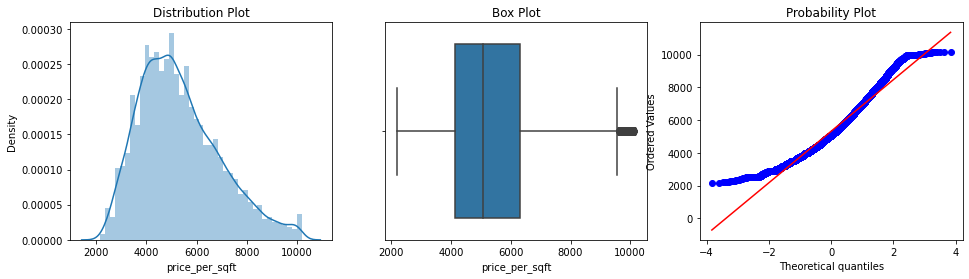

In [52]:
# Creating Diagonostic plot for df_filtered:

def Diagnostic_Plot(df2_filtered,var):
    plt.figure(figsize=(16,4))
    plt.subplot(1,3,1)
    sns.distplot(df2_filtered[var])
    plt.title('Distribution Plot')
    plt.subplot(1,3,2)
    sns.boxplot(df2_filtered[var])
    plt.title('Box Plot')
    plt.subplot(1,3,3)
    stats.probplot(df2_filtered[var],dist='norm',plot=plt)
    plt.show()

variable=df2_filtered.select_dtypes(include=['float64','int32']).columns
for i in variable:
    print(i)
    Diagnostic_Plot(df2_filtered,i)

In [53]:
# Checking the dataset:
df2_filtered.head()

,area_type,availability,location,bath,balcony,price,new_size,new_total_sqft,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1.0,39.07,2,1056.0,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,5.0,3.0,120.00,4,2600.0,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,2.0,3.0,62.00,3,1440.0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1.0,95.00,3,1521.0,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2.0,1.0,51.00,2,1200.0,4250.000000


### Step 9: Label Encoding:

In [54]:
# Firstly import the LabelEncoding:
from sklearn.preprocessing import LabelEncoder

In [55]:
# Let's use on the filtered dataset:
le=LabelEncoder()
df2_filtered['area_type'] = le.fit_transform(df2_filtered['area_type'])
df2_filtered['availability'] = le.fit_transform(df2_filtered['availability'])
df2_filtered['location'] = le.fit_transform(df2_filtered['location'])

In [56]:
# View the dataset:
df2_filtered.head()

,area_type,availability,location,bath,balcony,price,new_size,new_total_sqft,price_per_sqft
0,3,38,341,2.0,1.0,39.07,2,1056.0,3699.810606
1,2,77,251,5.0,3.0,120.00,4,2600.0,4615.384615
2,0,77,964,2.0,3.0,62.00,3,1440.0,4305.555556
3,3,77,629,3.0,1.0,95.00,3,1521.0,6245.890861
4,3,77,592,2.0,1.0,51.00,2,1200.0,4250.000000


### Step 10: Viewing The Clean Dataset:

In [57]:
df_clean=df2_filtered
df_clean

,area_type,availability,location,bath,balcony,price,new_size,new_total_sqft,price_per_sqft
0,3,38,341,2.0,1.0,39.07,2,1056.0,3699.810606
1,2,77,251,5.0,3.0,120.00,4,2600.0,4615.384615
2,0,77,964,2.0,3.0,62.00,3,1440.0,4305.555556
3,3,77,629,3.0,1.0,95.00,3,1521.0,6245.890861
4,3,77,592,2.0,1.0,51.00,2,1200.0,4250.000000
...,...,...,...,...,...,...,...,...,...
13313,3,77,964,2.0,1.0,57.00,3,1345.0,4237.918216
13314,3,77,384,3.0,3.0,112.00,3,1715.0,6530.612245
13315,0,77,1028,4.0,0.0,231.00,5,3453.0,6689.834926
13317,0,77,793,2.0,1.0,60.00,2,1141.0,5258.545136


### Step 11: Spliting The Dataset:

In [58]:
# Spliting the dataset into Target(y) and Features(X) variable
X=df_clean.drop('price',axis=1)
y=df_clean['price']

print('Shape of X:',X.shape)
print('Shape of y:',y.shape)

Shape of X: (11018, 8)
Shape of y: (11018,)


In [59]:
# Spliting into training and testing set:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.3, random_state=5)

print('Shape of X_train=',X_train.shape)
print('Shape of y_train=',y_train.shape)
print('Shape of X_test=',X_test.shape)
print('Shape of y_test=',y_test.shape)

Shape of X_train= (7712, 8)
Shape of y_train= (7712,)
Shape of X_test= (3306, 8)
Shape of y_test= (3306,)


### Step 12: Feature Scaling The Datasets:

In [60]:
# To normalize the different numerical value of the data so that machine can easly understand we use feature scaling:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

### Step 13: Linear Regression- ML Model Trainng:

In [61]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

### Step 14: Exploring The Trained Values:

In [62]:
# To see the coefficient values (i.e., Beta 1,2,..) learned by the model:
lr.coef_

array([-0.08977854, -0.69243503, -0.31265824, -0.60158651,  0.40548113,
       -4.53921148, 52.51403403, 25.46952516])

In [63]:
# To see which intersect value is leaned by the model:
lr.intercept_

82.43256094398339

### Step 15: Predicting The Value Of Home and Test:

In [75]:
# Single house features for testing the model:
X_test[0,:]

array([ 0.5478646 ,  0.51099842, -1.34688546, -0.46603561, -0.76020161,
       -0.62007877, -0.33613544,  0.85341299])

In [83]:
lr.predict([X_test[0, :]])

array([89.32163364])

In [77]:
# Actual price
y_test[276]

80.9

#### Note:
* Here the index of array `X_test[0,:]` is `276`that's why I've used.
* If you are getting confused then see the next step you'll get it.

### Step 16: Testing The Model:

In [78]:
X_test

array([[ 0.5478646 ,  0.51099842, -1.34688546, ..., -0.62007877,
        -0.33613544,  0.85341299],
       [ 0.5478646 , -0.92227791,  0.96642333, ..., -0.62007877,
        -0.03771065,  0.42285362],
       [ 0.5478646 , -1.24078377,  1.27795775, ...,  0.52094902,
         0.63715041,  0.52671147],
       ...,
       [ 0.5478646 ,  0.51099842,  0.79739933, ...,  0.52094902,
         0.09726157, -0.82241   ],
       [ 0.5478646 ,  0.51099842,  1.30778551, ..., -0.62007877,
        -0.34851821,  0.78938796],
       [ 0.5478646 ,  0.51099842, -1.10494915, ..., -0.62007877,
        -0.40671724, -0.26071805]])

In [79]:
lr.predict(X_test)

array([ 89.32163364,  94.29615644, 125.99997549, ...,  64.06720771,
        86.72903175,  57.6814261 ])

In [80]:
# Verify the actual values:
y_test

276       80.90
12167     87.00
8217     123.00
12317     47.25
4748      50.00
          ...  
9425      52.08
452       74.03
3027      62.40
6324      79.00
12342     56.50
Name: price, Length: 3306, dtype: float64

### Step 17: Checking The Accuracy of The Model:

In [81]:
lr.score(X_test,y_test)

0.95422905775247

### Conclusion:
* Our model is give us `95.42%` accureacy which is impressive.
* But we need to explore more model on the same dataset so that we can improve the accuracy.

```
Thanking You!
```